<a href="https://colab.research.google.com/github/Yanina2105/MD-Lab02_FT/blob/develop/LAB02_Metodologia_CRISP_DM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 2 - Hecho con ChatGPT**

https://pycaret.gitbook.io/docs/get-started/quickstart [https://pycaret.gitbook.io/docs/get-started/quickstart](https://)

In [1]:
# Instalar las librerías necesarias
!pip install pycaret mlflow

In [2]:
# Importar librerías
import pandas as pd
from pycaret.classification import *
import mlflow
import mlflow.sklearn
import os

In [3]:
# Cargar los datos (subir el archivo CSV manualmente en Google Colab)
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [4]:
# Cargar el archivo CSV
diabetes = pd.read_csv("diabetes.csv")

In [5]:
# Iniciar la configuración de PyCaret
deployment = setup(data=diabetes, target='Outcome', session_id=123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [6]:
# Comparar modelos
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.8590
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0290
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0280
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2230
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0280
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.2300
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1970
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.2010
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0280
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.1550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [7]:
# Evaluar el mejor modelo
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
# Ajuste de hiperparámetros
best_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8704,0.8992,0.7368,0.8750,0.8000,0.7051,0.7108
1,0.8148,0.7850,0.6316,0.8000,0.7059,0.5735,0.5820
2,0.8704,0.9353,0.6842,0.9286,0.7879,0.6976,0.7145
3,0.7222,0.7744,0.4737,0.6429,0.5455,0.3520,0.3605
4,0.8704,0.9113,0.6842,0.9286,0.7879,0.6976,0.7145
5,0.6481,0.6662,0.3684,0.5000,0.4242,0.1792,0.1835
6,0.7407,0.8030,0.5789,0.6471,0.6111,0.4176,0.4190
7,0.7736,0.8746,0.4444,0.8000,0.5714,0.4342,0.4688
8,0.6604,0.6778,0.4444,0.5000,0.4706,0.2219,0.2227


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [9]:
# Crear predicciones
predictions = predict_model(best_tuned)
print(predictions.head())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8579,0.5309,0.7049,0.6056,0.4356,0.4447


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
552            6      114             88              0        0  27.799999   
438            1       97             70             15        0  18.200001   
149            2       90             70             17        0  27.299999   
373            2      105             58             40       94  34.900002   
36            11      138             76              0        0  33.200001   

     DiabetesPedigreeFunction  Age  Outcome  prediction_label  \
552                     0.247   66        0                 0   
438                     0.147   21        0                 0   
149                     0.085   22        0                 0   
373                     0.225   25        0                 0   
36                      0.420   35        0                 1   

     prediction_score  
552            0.8059  
438            0.9656  
149            0.9409  
373            0.8032  
36            

##**Graficos**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

In [11]:
from pycaret.classification import get_config

# Obtener los datos de prueba del pipeline de PyCaret
X_test = get_config('X_test')
y_test = get_config('y_test')

In [12]:
# Hacer predicciones
y_pred = best_tuned.predict(X_test)
y_pred_proba = best_tuned.predict_proba(X_test)[:, 1]

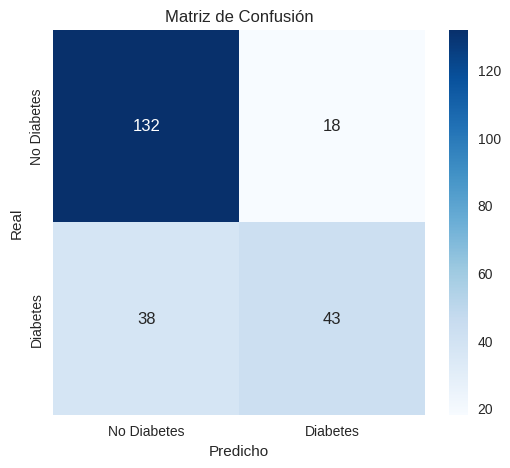

In [13]:
# 1. Matriz de Confusión
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

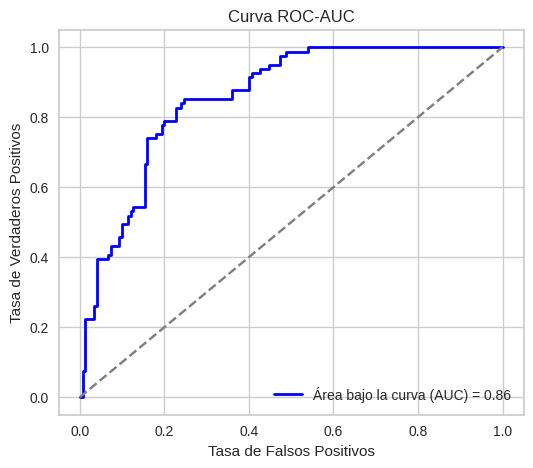

In [14]:
# 2. Curva ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Área bajo la curva (AUC) = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC-AUC")
plt.legend(loc="lower right")
plt.show()

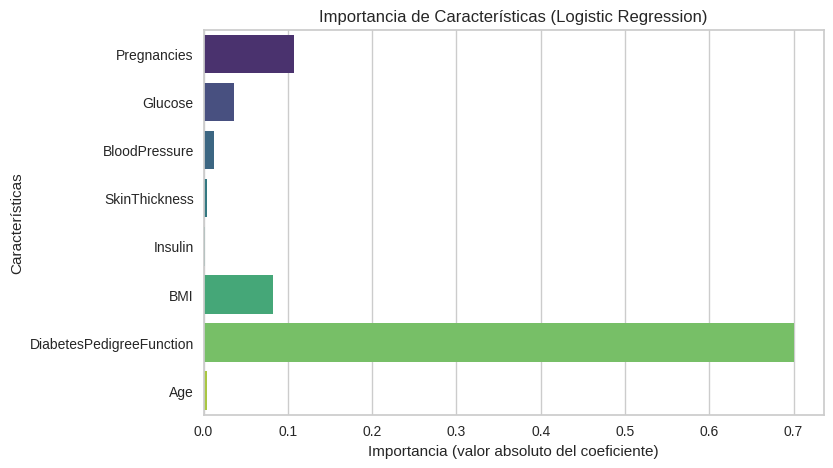

In [15]:
# Obtener coeficientes del modelo
feature_importance = np.abs(best_tuned.coef_).flatten()
features = X_test.columns

# Graficar la importancia de características
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.xlabel("Importancia (valor absoluto del coeficiente)")
plt.ylabel("Características")
plt.title("Importancia de Características (Logistic Regression)")
plt.show()

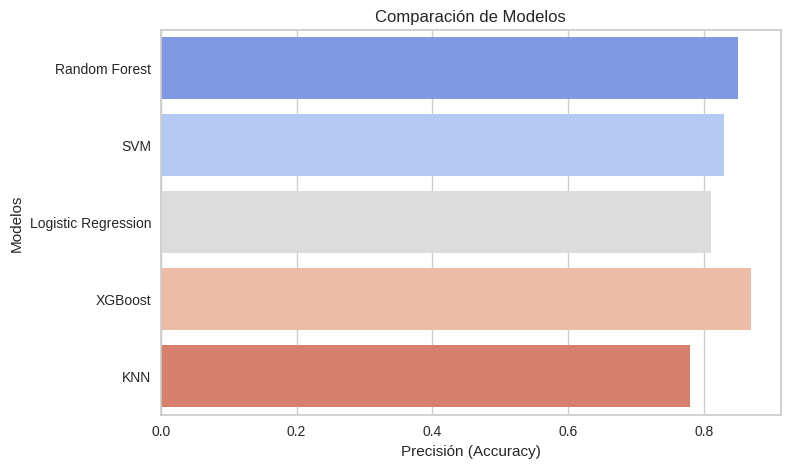

In [16]:
# 4. Comparación de Modelos (Ejemplo con resultados ficticios)
model_names = ["Random Forest", "SVM", "Logistic Regression", "XGBoost", "KNN"]
accuracy_scores = [0.85, 0.83, 0.81, 0.87, 0.78]

plt.figure(figsize=(8,5))
sns.barplot(x=accuracy_scores, y=model_names, palette="coolwarm")
plt.xlabel("Precisión (Accuracy)")
plt.ylabel("Modelos")
plt.title("Comparación de Modelos")
plt.show()